Name : Biyon Fernando

Index number : 190178J

Text(0.5, 1.0, 'Transformed')

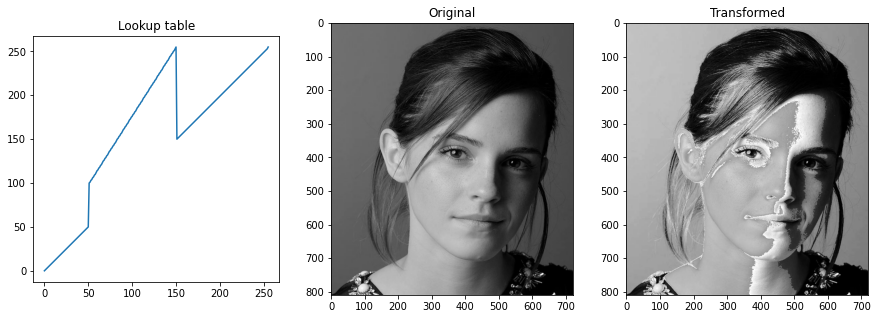

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'emma_gray.jpg')
assert img is not None

l1 = np.linspace(0,50,51)
l2 = np.linspace(100,255,100)
l3 = np.linspace(150,255,105)

lt = np.concatenate((l1,l2,l3), axis = 0).astype(np.uint8)

img2 = cv.LUT(img, lt)

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[0].set_title('Lookup table')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title('Original')
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title('Transformed')

Text(0.5, 1.0, 'Lookup table')

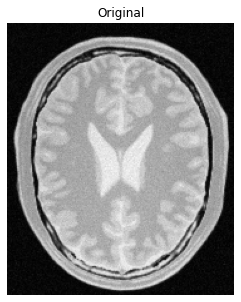

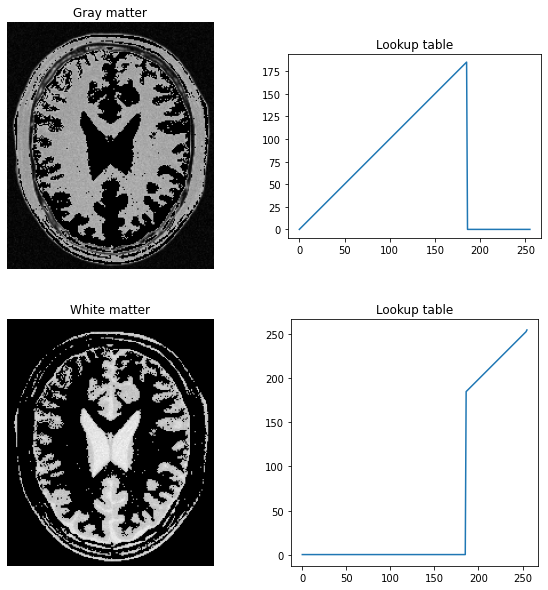

In [2]:
img = cv.imread(r'brain_proton_density_slice.png')
assert img is not None


treshold = 185
l1 = np.zeros(treshold+1)
l2 = np.linspace(treshold,255,255-treshold)


lt1 = np.concatenate((l1,l2), axis = 0).astype(np.uint8)

l3 = np.linspace(0,treshold, treshold+1)
l4 = np.zeros(255-treshold)

lt2 = np.concatenate((l3,l4), axis = 0).astype(np.uint8)

img2 = cv.LUT(img, lt1)

img3 = cv.LUT(img, lt2)

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title('Original')
ax.axis("off")


fig1, ax1 = plt.subplots(2,2,figsize = (10,10))

ax1[0][0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax1[0][0].set_title('Gray matter')
ax1[0][0].axis("off")

ax1[0][1].plot(lt2)
ax1[0][1].set_aspect('equal')
ax1[0][1].set_title('Lookup table')

ax1[1][0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax1[1][0].set_title('White matter')
ax1[1][0].axis("off")

ax1[1][1].plot(lt1)
ax1[1][1].set_aspect('equal')
ax1[1][1].set_title('Lookup table')


7 42
(480, 720) <class 'numpy.ndarray'>


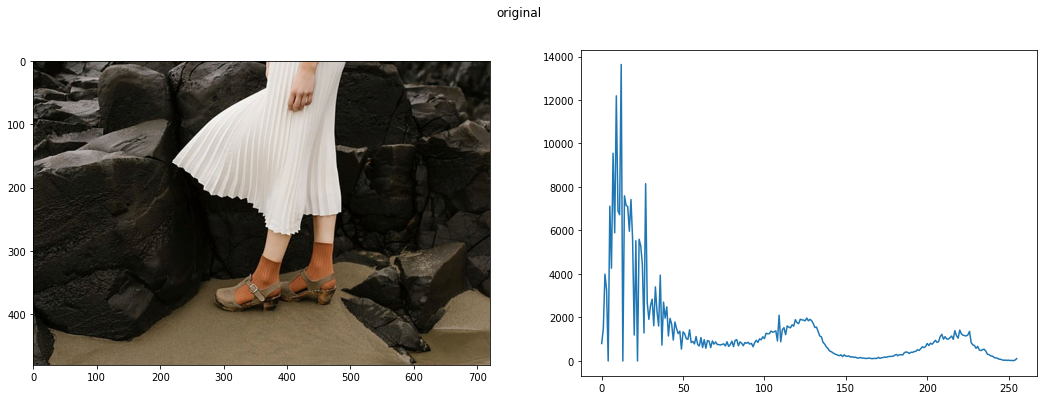

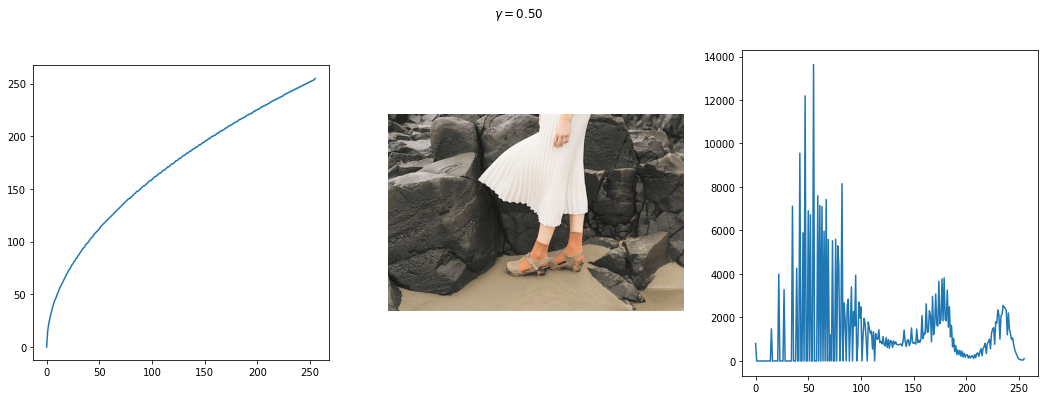

In [3]:
img0 = cv.imread(r'highlights_and_shadows.jpg')
assert img0 is not None


img1 = cv.cvtColor(img0, cv.COLOR_BGR2Lab)

L = img1[:,:,0]
a = img1[:,:,1]
b = img1[:,:,2]



hist_org = cv.calcHist([L], [0], None, [256], [0,256])


fig, ax = plt.subplots(1,2,figsize = (18,6))
fig.suptitle('original')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_Lab2RGB))
#ax[0].axis('off')
ax[1].plot(hist_org)

gamma = 0.5

lt = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)

L2 = cv.LUT(L, lt)

print(L[0][0],L2[0][0])

img1[:,:,0] = L2

print(L2.shape, type(lt))

hist = cv.calcHist([L2], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,3,figsize = (18,6))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_Lab2RGB))
ax[1].axis('off')
ax[2].plot(hist)

(-0.5, 499.5, 499.5, -0.5)

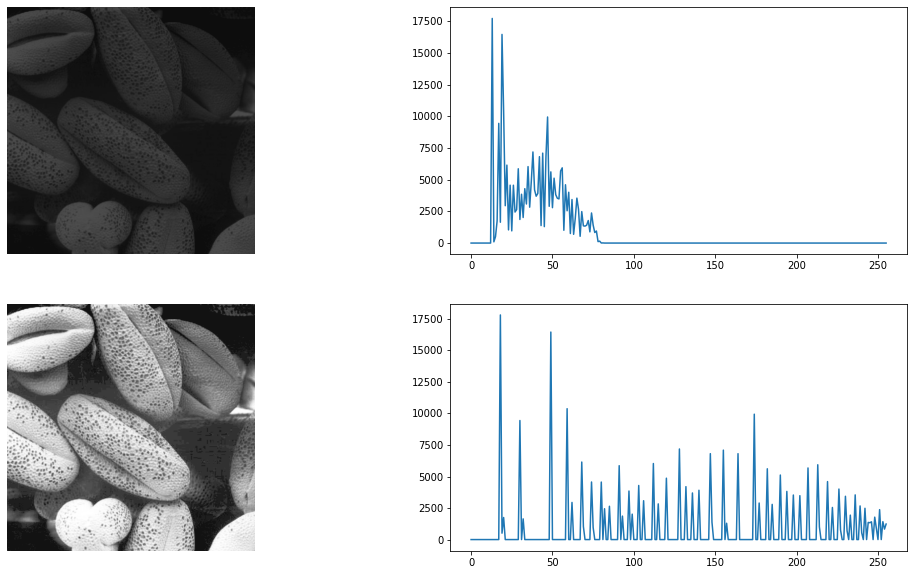

In [4]:
img0 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert img0 is not None

def grayImgEqualizingLookUp(img):
    M,N = img.shape
    L = 256
    hist = cv.calcHist([img], [0], None, [256], [0,256]) 
    #print(hist)

    lt = []
    sum = 0
    for nk in hist:
        sum+=nk[0]
        #print(nk,sum)
        lt.append(round((sum*(L-1))/(M*N)))
    return np.array(lt)

hist_org = cv.calcHist([img0], [0], None, [256], [0,256])

lt =grayImgEqualizingLookUp(img0)

#print(lt)
img1 = cv.LUT(img0, lt)

    
hist = cv.calcHist([img1.astype(np.uint8)], [0], None, [256], [0,256]) 
#hist = np.histogram(img1,bins='auto')
#print(hist)

fig, ax = plt.subplots(2,2,figsize = (18,10))


ax[0][0].imshow(cv.cvtColor(img0, cv.COLOR_GRAY2RGB))
ax[0][0].axis('off')
ax[0][1].plot(hist_org)
ax[1][0].imshow(cv.cvtColor(img1.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[1][1].plot(hist)
ax[1][0].axis('off')





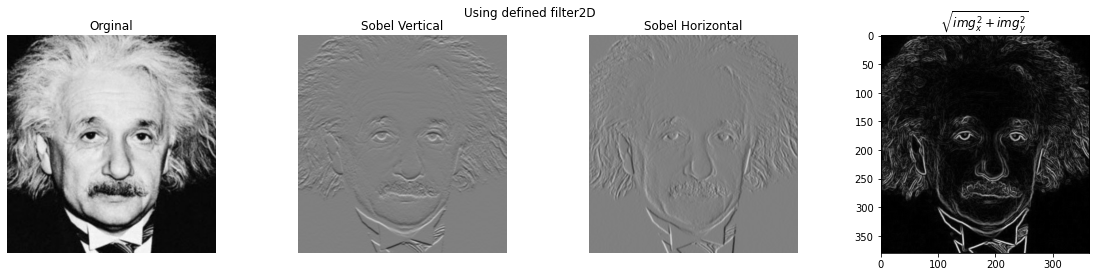

In [32]:
img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

#print(img)
img2 = cv.filter2D(img ,-1 ,xDir)
#print(img2)
img3 = cv.filter2D(img ,-1 ,yDir)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using defined filter2D')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

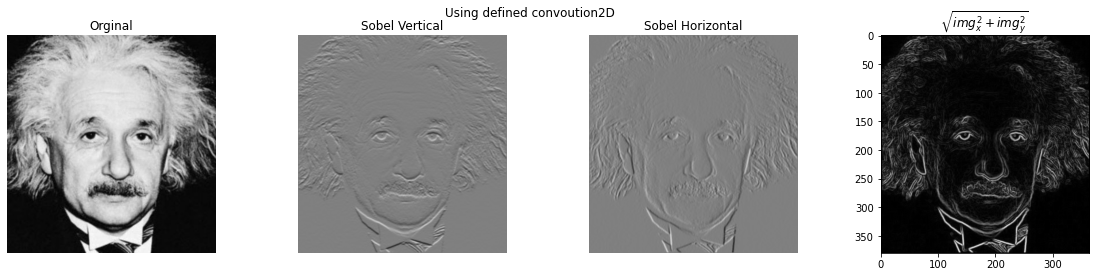

In [29]:
img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

def convoution2D(img, kernal):
    ksizex,ksizey = kernal.shape
    M,N = img.shape
    #print(ksizex,ksizey)
    #print(M,N)

    
    imgNew = np.zeros(img.shape)

    for i in range(M):
        for j in range(N):
            if (i<np.floor(ksizex/2) or j<np.floor(ksizey/2) or j> N - np.floor(ksizey/2) -1 or i> M - np.floor(ksizex/2)-1):
                imgNew[i][j]=0
            else:
                #print(img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1])
                imgNew[i][j] = sum(sum(kernal*img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1]))

    return imgNew

#print(img)

img2 = convoution2D(img, xDir)

#print(img2)
img3 = convoution2D(img, yDir)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using defined convoution2D')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

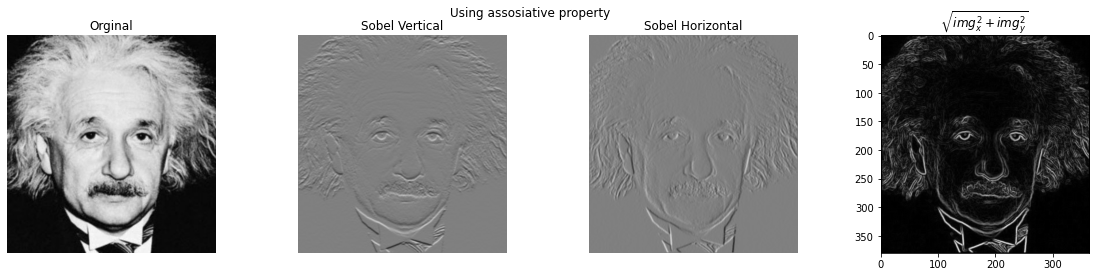

In [31]:
A = np.array([[1,2,1]])
B = np.array([[-1],[0],[1]])


img2 =convoution2D(convoution2D(img, A),B)

img3 = convoution2D(convoution2D(img, B.T),A.T)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

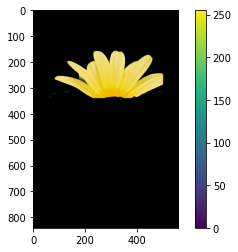

(<matplotlib.image.AxesImage at 0x238b6c72580>,
 None)

In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('daisy.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB)),plt.colorbar(),plt.show()

In [17]:
k = np.array([[1,2,3],[3,2,1]])
k1 = np.array([[1,2,3],[3,2,1]])
sum(sum(k*k1))
k
print(sum(sum(k[0:1,0:2])))

3
